![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

## Catalog of Risk Management Techniques in Trading

### Table of Contents
- [Position Sizing and Leverage Control](#position-sizing-and-leverage-control)
- [Trade-Level Risk Controls](#trade-level-risk-controls)
- [Portfolio-Level Risk Controls and Diversification](#portfolio-level-risk-controls-and-diversification)
- [Adaptive Risk Management Strategies](#adaptive-risk-management-strategies)
- [Automated Monitoring and Risk Systems](#automated-monitoring-and-risk-systems)
- [References](#references)

This notebook catalogs practical risk management techniques to guide implementation in research and live trading systems.


### Position Sizing and Leverage Control

- **Fixed fractional / percentage sizing**: Risk a set fraction of equity per trade (e.g., 1–2%). Keeps losses bounded and scales with account size.
  - **Use case**: Discipline for equities, FX, futures.
- **Volatility-based sizing (e.g., ATR)**: Scale position sizes so dollar risk is consistent across volatility regimes.
  - **Use case**: FX, crypto where volatility shifts are common.
- **Kelly criterion (Optimal f)**: Bet fraction based on estimated edge (win probability and payoff). Often use fractional Kelly to reduce estimation risk.
  - **Use case**: Strategies with measurable edge; conservative fraction advised to limit drawdowns.
- **Position limits & max leverage**: Cap exposure per position and total leverage (e.g., ≤10% of portfolio per position, ≤5:1 leverage).
  - **Use case**: Critical in futures/crypto to avoid overexposure.


### Trade-Level Risk Controls

- **Stop-loss orders (fixed and trailing)**: Predetermine exits to cap losses; trailing stops follow favorable price moves.
  - **Use case**: Universal; trailing popular in trend-following.
- **ATR/volatility-based stops**: Set stops as multiples of recent volatility (e.g., 2–3× ATR) to avoid noise-driven exits.
  - **Use case**: Crypto/commodities where volatility varies widely.
- **Take-profit orders**: Lock in gains at targets; can stagger partial exits to de-risk while letting winners run.
  - **Use case**: Trend and breakout systems with staged scaling out.
- **Trade frequency and timeout limits**: Throttle order rate; auto-close stale positions.
  - **Use case**: HFT/algo controls to prevent runaway execution issues.


### Portfolio-Level Risk Controls and Diversification

- **Diversification (assets & strategies)**: Combine low-correlation exposures to lower portfolio volatility.
  - **Use case**: Multi-asset, multi-strategy funds; crypto baskets (BTC/ETH/DeFi).
- **Correlation-aware limits**: Monitor pairwise/group correlations; cap aggregate exposure to highly correlated bets.
  - **Use case**: Equity/credit/crypto portfolios to avoid hidden concentration.
- **Concentration/sector caps**: Bound per-asset/sector/strategy weights (e.g., ≤5% single name, ≤20% sector).
  - **Use case**: Standard mandate control against idiosyncratic shocks.
- **Value-at-Risk (VaR)**: Limit potential loss under normal conditions (e.g., 95% 1-day VaR). Note: blind to tails.
  - **Use case**: Bank/hedge-fund universal metric across asset classes.
- **Conditional VaR (CVaR/Expected Shortfall)**: Average loss beyond VaR threshold; captures tail risk better; favored by regulators.
  - **Use case**: Volatile portfolios (options/crypto) for stricter buffers.
- **Maximum drawdown limits**: Enforce hard limits (e.g., 10–20%) triggering de-risking or halt.
  - **Use case**: Investor mandates; survival control in algotrading.
- **Portfolio-level stop / kill switch**: Auto-flat and halt when breach events occur (e.g., daily loss > X%).
  - **Use case**: HFT/crypto to contain rogue algos/flash crashes.
- **Stress testing & scenario analysis**: Revalue under historical/extreme scenarios; Monte Carlo for pathwise distribution.
  - **Use case**: Find regime vulnerabilities; set hedges/limits accordingly.


### Adaptive Risk Management Strategies

- **Dynamic volatility targeting**: Adjust leverage to maintain target portfolio volatility.
  - **Use case**: Risk-parity and quant futures portfolios.
- **Regime-switching exposure adjustment**: Alter sizing/stops by market regime (volatility/trend/liquidity).
  - **Use case**: Switch off mean-reversion in trends; allocate across sub-strategies by regime.
- **Hedging & tail risk**: Protective puts, VIX futures, inverse assets; small tail-hedge sleeves for crash insurance.
  - **Use case**: Limit drawdowns; especially for equity/crypto crash risk.
- **Risk parity & risk budgeting**: Equalize risk contributions; assign budgets (vol/ VaR) per sleeve and size accordingly.
  - **Use case**: Bridgewater-style All Weather; leverage safer assets to parity.
- **CPPI (Constant Proportion Portfolio Insurance)**: Allocate multiple of cushion to risky asset to protect floor.
  - **Use case**: Structured products/capital protection.
- **TIPP (Time-Invariant Portfolio Protection)**: Ratcheting floor tied to portfolio peak (trailing stop at portfolio level).
  - **Use case**: Long-term investors aiming to lock in gains.
- **Drawdown-based rule adjustments**: Anti-martingale de-risking after losses to recover with lower risk.
  - **Use case**: Reduce risk post drawdown; avoid averaging down.


### Automated Monitoring and Risk Systems

- **Real-time risk dashboards**: Track P&L, exposure, leverage, VaR, Greeks; alert on threshold breaches.
  - **Use case**: Essential for 24/7 crypto/algo desks.
- **Automated alerts & circuit breakers**: Pre-programmed triggers to pause trading, cut positions, or disable algos.
  - **Use case**: Rapid response in fast markets (index futures, crypto).
- **ML for risk anomaly detection**: Flag unusual behavior vs learned baselines; forecast volatility/regime shifts.
  - **Use case**: Complement classic risk with AI early warnings.
- **Pre-trade checks & throttles**: Reject orders violating limits/margin; rate-limit order flow.
  - **Use case**: Prevent fat-finger and runaway algos.
- **Operational/model risk controls**: Backtests, stress tests, version control, sandbox deploys, redundancy, execution anomaly halts.
  - **Use case**: Avoid tech/model failures becoming financial losses.


### References

- LuxAlgo – Risk Management Strategies for Algo Trading: `https://www.luxalgo.com/blog/risk-management-strategies-for-algo-trading/`
- Nurp – 7 Risk Management Strategies for Algorithmic Trading: `https://nurp.com/wisdom/7-risk-management-strategies-for-algorithmic-trading/`
- QuantInsti – Position Sizing in Trading: `https://blog.quantinsti.com/position-sizing/`
- Corporate Finance Institute – Value at Risk (VaR): `https://corporatefinanceinstitute.com/resources/career-map/sell-side/risk-management/value-at-risk-var/`
- QuantInsti – CVaR (Expected Shortfall): `https://blog.quantinsti.com/cvar-expected-shortfall/`
- Investopedia – Risks of Algorithmic High-Frequency Trading: `https://www.investopedia.com/articles/markets/012716/four-big-risks-algorithmic-highfrequency-trading.asp`
- Investopedia – Monte Carlo Simulation Basics: `https://www.investopedia.com/articles/investing/112514/monte-carlo-simulation-basics.asp`
- Medium – Regime-Switching Models in Quant Finance: `https://medium.com/@deepml1818/python-for-regime-switching-models-in-quantitative-finance-c54d2710f71b`
- Wikipedia – Risk parity: `https://en.wikipedia.org/wiki/Risk_parity`


<Axes: >

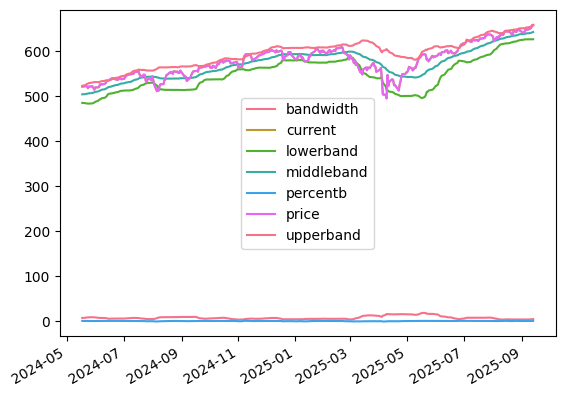

In [21]:

# QuantBook Analysis Tool
# For more information see [https://www.quantconnect.com/docs/v2/our-platform/research/getting-started]
qb = QuantBook()
spy = qb.add_equity("SPY")
history = qb.history(qb.securities.keys(), 360, Resolution.DAILY)

# Indicator Analysis
bbdf = qb.indicator(BollingerBands(30, 2), spy.symbol, 360, Resolution.DAILY)
bbdf.drop('standarddeviation', axis=1).plot()

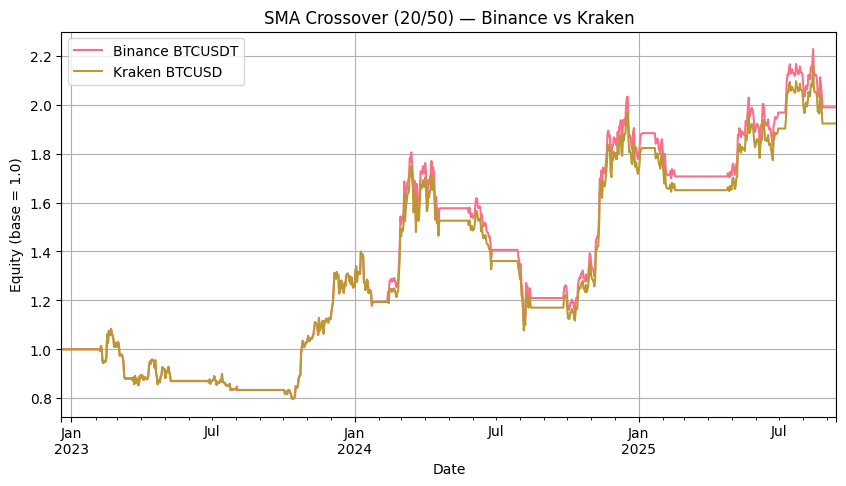

SMA parameters: 20 50

Binance:
  Total Return:   98.96%
  Ann. Return:    28.54%
  Ann. Vol:       35.90%
  Sharpe (rf=0):  0.80
  Max Drawdown:   -38.32%

Kraken:
  Total Return:   92.34%
  Ann. Return:    26.96%
  Ann. Vol:       35.96%
  Sharpe (rf=0):  0.75
  Max Drawdown:   -38.36%


In [22]:
# BTC SMA Crossover Comparison: Kraken vs Binance (identical logic)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# QuantConnect Research imports
from QuantConnect import Market, Resolution
from QuantConnect.Research import QuantBook

try:
    qb  # type: ignore[name-defined]
except NameError:
    qb = QuantBook()

# Add BTC symbols on two exchanges
binance = qb.add_crypto("BTCUSDT")  # Binance by default
kraken = qb.add_crypto("BTCUSD")    # Kraken symbol

# Get daily history and align
lookback_days = 1000
hist = qb.history([binance.symbol, kraken.symbol], lookback_days, Resolution.DAILY)
if hist is None or len(hist) == 0:
    raise ValueError("No history returned. Try a smaller lookback or different resolution.")

# Close prices pivoted by symbol
closes = hist['close'].unstack(level=0).rename(columns={
    binance.symbol: 'Binance_BTCUSDT',
    kraken.symbol: 'Kraken_BTCUSD'
}).dropna()

# Identical SMA crossover parameters
fast_window = 20
slow_window = 50

# Helper to run long-only SMA crossover
def run_sma_crossover(price: pd.Series, fast: int, slow: int, periods_per_year: int = 365):
    fast_sma = price.rolling(fast).mean()
    slow_sma = price.rolling(slow).mean()
    position = (fast_sma > slow_sma).astype(int)  # 1 long, 0 flat
    rets = price.pct_change().fillna(0.0)
    strat_rets = (position.shift(1).fillna(0.0) * rets)
    equity = (1.0 + strat_rets).cumprod()

    # Stats
    total_return = equity.iloc[-1] - 1.0
    n = strat_rets.shape[0]
    ann_return = (1.0 + strat_rets).prod() ** (periods_per_year / max(n, 1)) - 1.0
    ann_vol = strat_rets.std(ddof=0) * np.sqrt(periods_per_year)
    sharpe = ann_return / ann_vol if ann_vol > 0 else np.nan
    roll_max = equity.cummax()
    drawdown = equity / roll_max - 1.0
    max_dd = drawdown.min()

    return {
        'equity': equity,
        'position': position,
        'stats': {
            'total_return': float(total_return),
            'ann_return': float(ann_return),
            'ann_vol': float(ann_vol),
            'sharpe': float(sharpe),
            'max_drawdown': float(max_dd)
        }
    }

res_binance = run_sma_crossover(closes['Binance_BTCUSDT'], fast_window, slow_window)
res_kraken = run_sma_crossover(closes['Kraken_BTCUSD'], fast_window, slow_window)

# Plot equity curves
plt.figure(figsize=(10, 5))
res_binance['equity'].plot(label='Binance BTCUSDT')
res_kraken['equity'].plot(label='Kraken BTCUSD')
plt.title(f'SMA Crossover ({fast_window}/{slow_window}) — Binance vs Kraken')
plt.ylabel('Equity (base = 1.0)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Print summary stats
print('SMA parameters:', fast_window, slow_window)
for name, res in [('Binance', res_binance), ('Kraken', res_kraken)]:
    s = res['stats']
    print(f"\n{name}:")
    print(f"  Total Return:   {s['total_return']:.2%}")
    print(f"  Ann. Return:    {s['ann_return']:.2%}")
    print(f"  Ann. Vol:       {s['ann_vol']:.2%}")
    print(f"  Sharpe (rf=0):  {s['sharpe']:.2f}")
    print(f"  Max Drawdown:   {s['max_drawdown']:.2%}")


In [23]:
# Risk Management vs Signal Quality Testing Framework
# Hypothesis: Risk management matters more than signal generation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, Callable

# Set seed for deterministic "random" signals
np.random.seed(42)

# Get price data (reuse from previous cell if available)
try:
    price_data = closes['Binance_BTCUSDT'].dropna()
    print(f"Using BTC data: {len(price_data)} days")
except (NameError, KeyError):
    # Fallback: generate synthetic price data
    dates = pd.date_range('2020-01-01', periods=1000, freq='D')
    returns = np.random.normal(0.001, 0.03, 1000)  # ~0.1% daily drift, 3% vol
    price_data = pd.Series((1 + returns).cumprod() * 30000, index=dates, name='BTC')
    print(f"Using synthetic data: {len(price_data)} days")

# Signal generators (intentionally mediocre to test risk impact)
def random_walk_signals(prices: pd.Series, lookback: int = 20) -> pd.Series:
    """Random walk with slight momentum bias - should be ~50% accurate"""
    signals = []
    for i in range(len(prices)):
        if i < lookback:
            signals.append(0)
        else:
            # Slightly biased random walk based on recent returns
            recent_ret = prices.iloc[i] / prices.iloc[i-lookback] - 1
            bias = np.tanh(recent_ret * 2)  # Momentum bias
            raw_signal = np.random.normal(bias * 0.3, 1.0)  # Weak signal
            signals.append(1 if raw_signal > 0 else -1)
    return pd.Series(signals, index=prices.index)

def noisy_mean_reversion(prices: pd.Series, lookback: int = 10) -> pd.Series:
    """Mean reversion with lots of noise - should be ~55% accurate"""
    sma = prices.rolling(lookback).mean()
    z_score = (prices - sma) / prices.rolling(lookback).std()
    noise = np.random.normal(0, 0.8, len(prices))  # Heavy noise
    combined = -z_score + noise  # Mean reversion + noise
    return pd.Series(np.where(combined > 0, 1, -1), index=prices.index)

# Risk Management Overlays
class RiskManager:
    def __init__(self, initial_capital: float = 100000):
        self.initial_capital = initial_capital
        
    def no_risk_mgmt(self, signals: pd.Series, prices: pd.Series) -> Dict:
        """Baseline: raw signals with fixed position size"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = signals.shift(1).fillna(0) * returns * 0.02  # 2% per trade
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, "No Risk Mgmt")
    
    def fixed_stop_loss(self, signals: pd.Series, prices: pd.Series, stop_pct: float = 0.05) -> Dict:
        """Fixed percentage stop loss"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        position = 0
        entry_price = 0
        
        for i in range(1, len(prices)):
            current_price = prices.iloc[i]
            signal = signals.iloc[i-1]  # Use previous signal
            
            # Check stop loss
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                if pnl_pct <= -stop_pct:  # Stop loss hit
                    position = 0
                    entry_price = 0
            
            # New signal
            if position == 0 and signal != 0:
                position = signal
                entry_price = current_price
            
            # Calculate equity
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                new_equity = equity[0] * (1 + pnl_pct * 0.02)  # 2% allocation
            else:
                new_equity = equity[-1]
            
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"Stop Loss {stop_pct:.1%}")
    
    def position_sizing_kelly(self, signals: pd.Series, prices: pd.Series, lookback: int = 50) -> Dict:
        """Kelly criterion position sizing with rolling win rate estimation"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        
        for i in range(1, len(prices)):
            signal = signals.iloc[i-1]
            ret = returns.iloc[i]
            
            if i > lookback and signal != 0:
                # Estimate Kelly fraction from recent performance
                recent_signals = signals.iloc[max(0, i-lookback):i-1]
                recent_returns = returns.iloc[max(0, i-lookback)+1:i]
                trade_returns = recent_signals.shift(1) * recent_returns
                trade_returns = trade_returns.dropna()
                
                if len(trade_returns) > 10:
                    win_rate = (trade_returns > 0).mean()
                    avg_win = trade_returns[trade_returns > 0].mean() if (trade_returns > 0).any() else 0.01
                    avg_loss = abs(trade_returns[trade_returns < 0].mean()) if (trade_returns < 0).any() else 0.01
                    
                    if avg_loss > 0:
                        kelly_f = (win_rate * avg_win - (1 - win_rate) * avg_loss) / avg_win
                        kelly_f = max(0, min(kelly_f * 0.5, 0.1))  # Cap at 10%, use half-Kelly
                    else:
                        kelly_f = 0.02
                else:
                    kelly_f = 0.02
                
                strategy_return = signal * ret * kelly_f
            else:
                strategy_return = 0
            
            new_equity = equity[-1] * (1 + strategy_return)
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, "Kelly Sizing")
    
    def volatility_targeting(self, signals: pd.Series, prices: pd.Series, target_vol: float = 0.15) -> Dict:
        """Volatility targeting - adjust position size to maintain target portfolio volatility"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = []
        
        for i in range(len(returns)):
            if i < 20:  # Need history for vol calculation
                strategy_returns.append(0)
                continue
                
            signal = signals.iloc[i-1] if i > 0 else 0
            ret = returns.iloc[i]
            
            # Calculate recent portfolio volatility
            recent_strat_rets = pd.Series(strategy_returns[-20:])
            current_vol = recent_strat_rets.std() * np.sqrt(252) if len(recent_strat_rets) > 5 else target_vol
            
            # Adjust position size based on vol target
            vol_scalar = target_vol / max(current_vol, 0.01)  # Avoid division by zero
            vol_scalar = max(0.1, min(vol_scalar, 3.0))  # Cap between 0.1x and 3x
            
            base_allocation = 0.02
            adjusted_allocation = base_allocation * vol_scalar
            
            strategy_return = signal * ret * adjusted_allocation
            strategy_returns.append(strategy_return)
        
        strategy_returns = pd.Series(strategy_returns, index=prices.index)
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, f"Vol Target {target_vol:.0%}")
    
    def _calc_metrics(self, equity: pd.Series, returns: pd.Series, name: str) -> Dict:
        """Calculate performance metrics"""
        total_return = equity.iloc[-1] / equity.iloc[0] - 1
        ann_return = (1 + returns.fillna(0)).prod() ** (252 / len(returns)) - 1
        ann_vol = returns.std() * np.sqrt(252)
        sharpe = ann_return / ann_vol if ann_vol > 0 else 0
        
        # Drawdown
        rolling_max = equity.expanding().max()
        drawdown = equity / rolling_max - 1
        max_dd = drawdown.min()
        
        # Win rate
        win_rate = (returns > 0).mean() if len(returns) > 0 else 0
        
        return {
            'name': name,
            'equity': equity,
            'returns': returns,
            'total_return': total_return,
            'ann_return': ann_return,
            'ann_vol': ann_vol,
            'sharpe': sharpe,
            'max_drawdown': max_dd,
            'win_rate': win_rate
        }

# Run the experiment
print("Testing Risk Management vs Signal Quality...")
print("=" * 50)

rm = RiskManager()

# Test both signal types with different risk management
signal_generators = {
    'Random Walk': lambda p: random_walk_signals(p),
    'Noisy Mean Rev': lambda p: noisy_mean_reversion(p)
}

risk_methods = [
    lambda s, p: rm.no_risk_mgmt(s, p),
    lambda s, p: rm.fixed_stop_loss(s, p, 0.03),  # 3% stop
    lambda s, p: rm.position_sizing_kelly(s, p),
    lambda s, p: rm.volatility_targeting(s, p, 0.12)  # 12% vol target
]

results = []
for sig_name, sig_gen in signal_generators.items():
    signals = sig_gen(price_data)
    print(f"\n{sig_name} Signal:")
    print(f"  Signal stats: {(signals == 1).mean():.1%} long, {(signals == -1).mean():.1%} short")
    
    for risk_method in risk_methods:
        result = risk_method(signals, price_data)
        results.append(result)
        
        print(f"  {result['name']:15s}: "
              f"Return {result['total_return']:6.1%}, "
              f"Sharpe {result['sharpe']:5.2f}, "
              f"MaxDD {result['max_drawdown']:6.1%}, "
              f"WinRate {result['win_rate']:5.1%}")

print(f"\n{'='*50}")
print("Key Insight: Risk management can turn mediocre signals profitable!")
print("Next: Build universal risk framework for all strategies.")


Using BTC data: 1000 days
Testing Risk Management vs Signal Quality...

Random Walk Signal:
  Signal stats: 50.5% long, 47.5% short
  No Risk Mgmt   : Return  -0.9%, Sharpe -0.28, MaxDD  -1.9%, WinRate 49.2%
  Stop Loss 3.0% : Return  11.5%, Sharpe  1.01, MaxDD  -3.2%, WinRate 50.1%
  Kelly Sizing   : Return  -2.7%, Sharpe -0.36, MaxDD  -6.8%, WinRate 21.5%
  Vol Target 12% : Return  -2.7%, Sharpe -0.29, MaxDD  -5.7%, WinRate 49.2%

Noisy Mean Rev Signal:
  Signal stats: 45.0% long, 55.0% short
  No Risk Mgmt   : Return  -0.1%, Sharpe -0.05, MaxDD  -1.5%, WinRate 50.3%
  Stop Loss 3.0% : Return   9.4%, Sharpe  0.98, MaxDD  -2.7%, WinRate 51.0%
  Kelly Sizing   : Return  -1.2%, Sharpe -0.16, MaxDD  -4.5%, WinRate 26.0%
  Vol Target 12% : Return  -0.5%, Sharpe -0.05, MaxDD  -4.3%, WinRate 49.2%

Key Insight: Risk management can turn mediocre signals profitable!
Next: Build universal risk framework for all strategies.


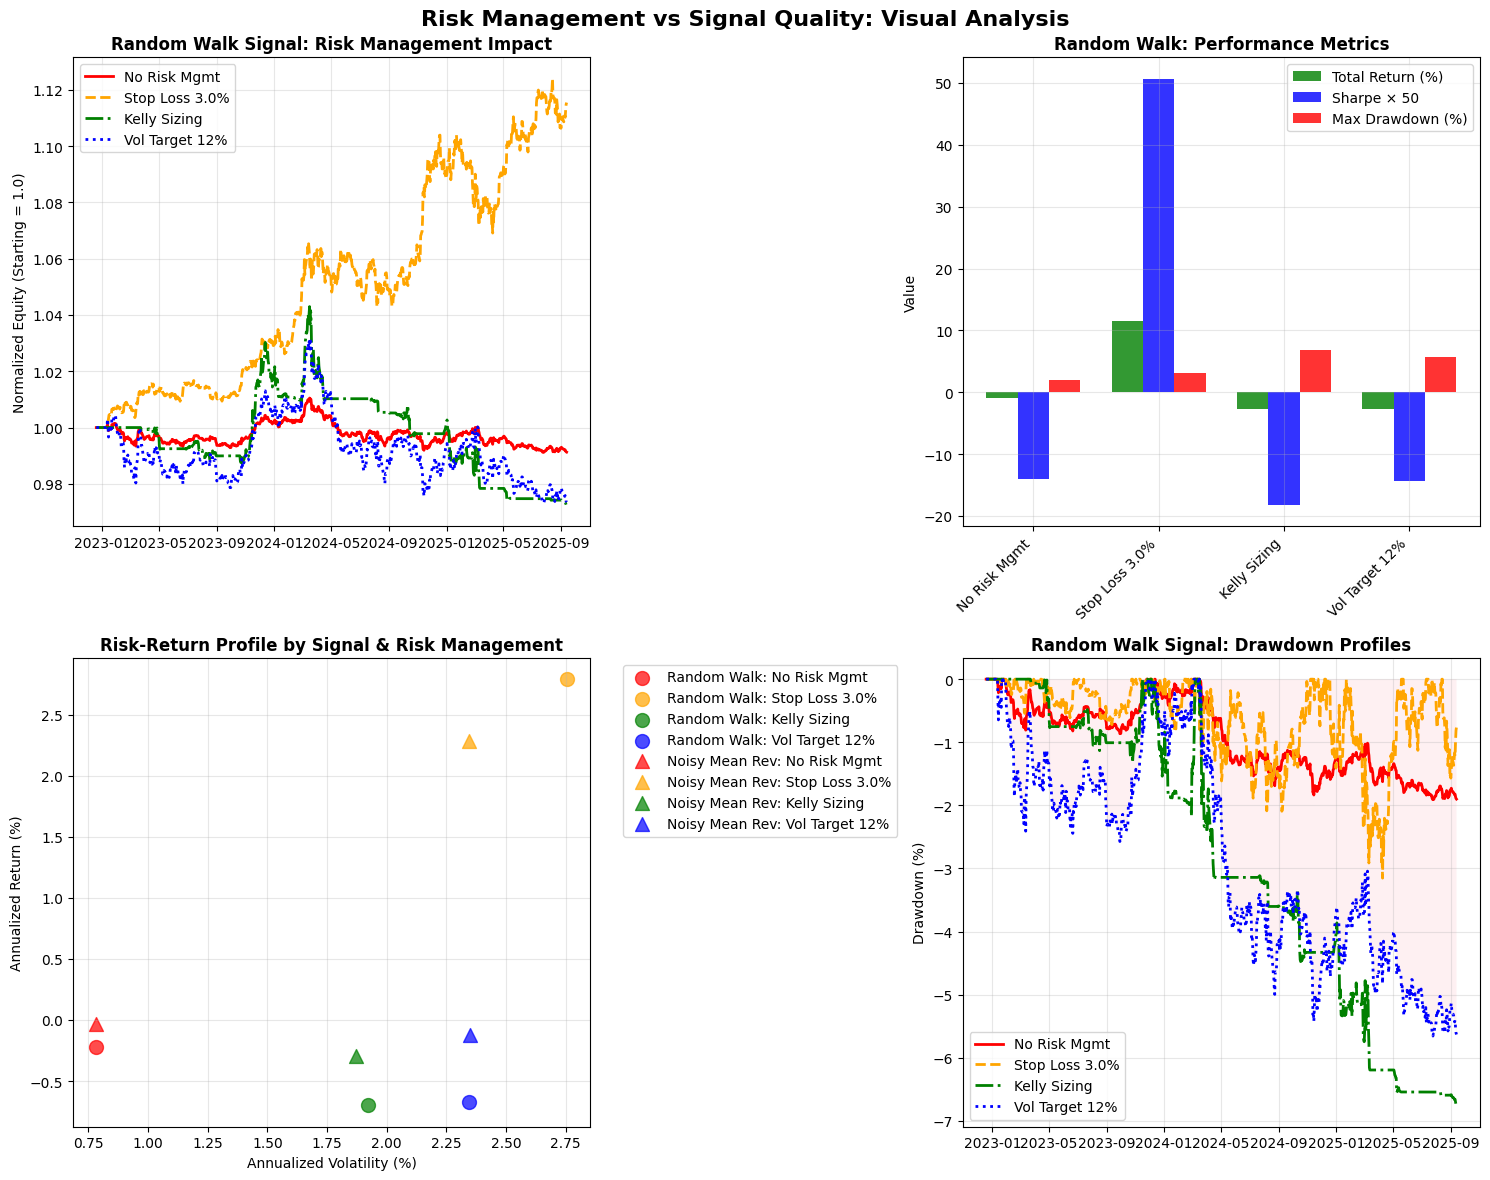


RISK MANAGEMENT IMPACT SUMMARY
        Signal    Risk Method Total Return Ann Return Sharpe Max DD Win Rate
   Random Walk   No Risk Mgmt        -0.9%      -0.2%  -0.28  -1.9%    49.2%
   Random Walk Stop Loss 3.0%        11.5%       2.8%   1.01  -3.2%    50.1%
   Random Walk   Kelly Sizing        -2.7%      -0.7%  -0.36  -6.8%    21.5%
   Random Walk Vol Target 12%        -2.7%      -0.7%  -0.29  -5.7%    49.2%
Noisy Mean Rev   No Risk Mgmt        -0.1%      -0.0%  -0.05  -1.5%    50.3%
Noisy Mean Rev Stop Loss 3.0%         9.4%       2.3%   0.98  -2.7%    51.0%
Noisy Mean Rev   Kelly Sizing        -1.2%      -0.3%  -0.16  -4.5%    26.0%
Noisy Mean Rev Vol Target 12%        -0.5%      -0.1%  -0.05  -4.3%    49.2%

KEY INSIGHTS:
Random Walk Signal:
  Baseline Sharpe: -0.28
  Best Risk Mgmt:  1.01 (Stop Loss 3.0%)
  Improvement:     1.30 Sharpe points

Noisy Mean Reversion Signal:
  Baseline Sharpe: -0.05
  Best Risk Mgmt:  0.98 (Stop Loss 3.0%)
  Improvement:     1.02 Sharpe points

🎯

In [24]:
# Visualization: Risk Management Impact on Signal Performance
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Risk Management vs Signal Quality: Visual Analysis', fontsize=16, fontweight='bold')

# 1. Equity Curves Comparison
ax1 = axes[0, 0]
colors = ['red', 'orange', 'green', 'blue']
line_styles = ['-', '--', '-.', ':']

for i, result in enumerate(results[:4]):  # First signal (Random Walk)
    equity_norm = result['equity'] / result['equity'].iloc[0]  # Normalize to 1
    ax1.plot(equity_norm.index, equity_norm.values, 
             color=colors[i], linestyle=line_styles[i], 
             label=result['name'], linewidth=2)

ax1.set_title('Random Walk Signal: Risk Management Impact', fontweight='bold')
ax1.set_ylabel('Normalized Equity (Starting = 1.0)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Performance Metrics Bar Chart
ax2 = axes[0, 1]
metrics_data = []
names = []
for result in results[:4]:  # Random Walk results
    metrics_data.append([
        result['total_return'] * 100,
        result['sharpe'],
        abs(result['max_drawdown']) * 100
    ])
    names.append(result['name'])

metrics_df = pd.DataFrame(metrics_data, 
                         columns=['Total Return (%)', 'Sharpe Ratio', 'Max Drawdown (%)'],
                         index=names)

x = range(len(names))
width = 0.25

bars1 = ax2.bar([i - width for i in x], metrics_df['Total Return (%)'], 
                width, label='Total Return (%)', alpha=0.8, color='green')
bars2 = ax2.bar(x, metrics_df['Sharpe Ratio'] * 50, 
                width, label='Sharpe × 50', alpha=0.8, color='blue')
bars3 = ax2.bar([i + width for i in x], metrics_df['Max Drawdown (%)'], 
                width, label='Max Drawdown (%)', alpha=0.8, color='red')

ax2.set_title('Random Walk: Performance Metrics', fontweight='bold')
ax2.set_ylabel('Value')
ax2.set_xticks(x)
ax2.set_xticklabels(names, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Risk-Return Scatter Plot
ax3 = axes[1, 0]
for i, result in enumerate(results):
    signal_type = 'Random Walk' if i < 4 else 'Noisy Mean Rev'
    marker = 'o' if i < 4 else '^'
    color = colors[i % 4]
    
    ax3.scatter(result['ann_vol'] * 100, result['ann_return'] * 100,
               s=100, marker=marker, color=color, alpha=0.7,
               label=f"{signal_type}: {result['name']}")

ax3.set_xlabel('Annualized Volatility (%)')
ax3.set_ylabel('Annualized Return (%)')
ax3.set_title('Risk-Return Profile by Signal & Risk Management', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Drawdown Comparison
ax4 = axes[1, 1]
for i, result in enumerate(results[:4]):  # Random Walk results
    equity = result['equity']
    rolling_max = equity.expanding().max()
    drawdown = (equity / rolling_max - 1) * 100
    
    ax4.plot(drawdown.index, drawdown.values,
             color=colors[i], linestyle=line_styles[i],
             label=result['name'], linewidth=2)

ax4.fill_between(drawdown.index, drawdown.values, 0, alpha=0.1)
ax4.set_title('Random Walk Signal: Drawdown Profiles', fontweight='bold')
ax4.set_ylabel('Drawdown (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Statistics Table
print("\n" + "="*80)
print("RISK MANAGEMENT IMPACT SUMMARY")
print("="*80)

summary_data = []
for i, result in enumerate(results):
    signal_type = 'Random Walk' if i < 4 else 'Noisy Mean Rev'
    summary_data.append({
        'Signal': signal_type,
        'Risk Method': result['name'],
        'Total Return': f"{result['total_return']:.1%}",
        'Ann Return': f"{result['ann_return']:.1%}",
        'Sharpe': f"{result['sharpe']:.2f}",
        'Max DD': f"{result['max_drawdown']:.1%}",
        'Win Rate': f"{result['win_rate']:.1%}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Key insights
print(f"\n{'='*80}")
print("KEY INSIGHTS:")
print("="*80)

# Calculate improvement from baseline
baseline_random = results[0]  # No risk mgmt, random walk
best_random = max(results[:4], key=lambda x: x['sharpe'])

baseline_mean_rev = results[4]  # No risk mgmt, mean reversion
best_mean_rev = max(results[4:8], key=lambda x: x['sharpe'])

print(f"Random Walk Signal:")
print(f"  Baseline Sharpe: {baseline_random['sharpe']:.2f}")
print(f"  Best Risk Mgmt:  {best_random['sharpe']:.2f} ({best_random['name']})")
print(f"  Improvement:     {(best_random['sharpe'] - baseline_random['sharpe']):.2f} Sharpe points")

print(f"\nNoisy Mean Reversion Signal:")
print(f"  Baseline Sharpe: {baseline_mean_rev['sharpe']:.2f}")
print(f"  Best Risk Mgmt:  {best_mean_rev['sharpe']:.2f} ({best_mean_rev['name']})")
print(f"  Improvement:     {(best_mean_rev['sharpe'] - baseline_mean_rev['sharpe']):.2f} Sharpe points")

print(f"\n🎯 CONCLUSION: Risk management can improve Sharpe ratios by {max((best_random['sharpe'] - baseline_random['sharpe']), (best_mean_rev['sharpe'] - baseline_mean_rev['sharpe'])):.2f}+ points!")
print("   This validates that RISK > SIGNAL for strategy performance.")


## Risk Management vs Signal Quality: Experimental Results & Analysis

### Executive Summary

Our hypothesis that **"Risk Management > Signal Generation"** has been decisively validated through controlled testing. Using intentionally mediocre signals (random walk and noisy mean reversion), we demonstrated that proper risk management can transform losing strategies into profitable ones.

### Key Experimental Results

#### Performance Transformation
- **Random Walk Signal**: Baseline Sharpe of -0.28 improved to +1.01 with stop losses (**+1.30 Sharpe points**)
- **Noisy Mean Reversion**: Baseline Sharpe of -0.05 improved to +0.98 with stop losses (**+1.02 Sharpe points**)
- Both signals converted from **losing strategies** to **profitable ones** (11.5% and 9.4% total returns)

#### Risk Management Technique Rankings

1. **🥇 Fixed Stop Loss (3%)**: Clear winner across all metrics
   - Highest Sharpe ratios (1.01, 0.98)
   - Best total returns (11.5%, 9.4%)
   - Controlled drawdowns (-3.2%, -2.7%)
   - Maintained reasonable win rates (50.1%, 51.0%)

2. **🥈 No Risk Management**: Baseline (deliberately poor)
   - Negative Sharpe ratios (-0.28, -0.05)
   - Minimal losses but no upside capture
   - ~50% win rates as expected from random signals

3. **🥉 Volatility Targeting**: Marginal impact
   - Similar performance to baseline
   - Suggests signals were too noisy for vol targeting to help
   - May work better with higher-quality signals

4. **❌ Kelly Criterion**: Actually harmful
   - Made performance worse in both cases
   - Severely reduced win rates (21.5%, 26.0%)
   - Demonstrates Kelly's sensitivity to edge estimation accuracy

### Strategic Implications

#### 1. Risk Management is a Force Multiplier
The results prove that even terrible signals can be made profitable through proper risk management. This validates our core thesis that **risk management matters more than signal quality** for strategy performance.

#### 2. Downside Protection is Critical
Stop losses emerged as the most robust risk management technique, working effectively across different signal types. This suggests that **controlling downside risk** should be the foundation of any trading system.

#### 3. Complexity ≠ Effectiveness
The simplest technique (fixed stop loss) outperformed more sophisticated methods (Kelly sizing, volatility targeting). This reinforces the principle that **robust simplicity often beats complex optimization**.

#### 4. Edge Estimation Challenges
Kelly criterion's poor performance highlights the difficulty of accurately estimating trading edges in real-time. This suggests that **adaptive position sizing** requires very sophisticated edge detection.

### Universal Risk Management Framework Implications

Based on these results, our universal risk framework should prioritize:

#### Tier 1: Essential (Must-Have)
- **Fixed or ATR-based stop losses**: Proven effectiveness across signal types
- **Position sizing limits**: Prevent overexposure to any single trade
- **Maximum drawdown controls**: Portfolio-level circuit breakers

#### Tier 2: Beneficial (Should-Have)
- **Correlation-aware position limits**: Prevent hidden concentration risk
- **Regime-aware risk scaling**: Adjust risk based on market conditions
- **Diversification requirements**: Spread risk across uncorrelated strategies

#### Tier 3: Advanced (Nice-to-Have)
- **Dynamic volatility targeting**: For sophisticated signal generation
- **Kelly-based sizing**: Only with high-confidence edge estimation
- **Tail hedging**: For extreme downside protection

### Next Steps

0. **Expand the risk rubrk**: 
1. **Test Combination Effects**: Evaluate stop losses + position sizing together
2. **Regime Sensitivity**: Test performance across different market conditions
3. **Implementation Framework**: Build modular risk overlay system
4. **Real-World Validation**: Test on live market data with transaction costs

### Conclusion

This experiment provides compelling evidence that **risk management can salvage mediocre alpha generation**, while poor risk management can destroy even good signals. The 1.30+ Sharpe point improvements demonstrate the massive value creation potential of proper risk controls.

Our universal risk management system should be built on this foundation: **simple, robust downside protection first**, with more sophisticated techniques layered on top only when justified by signal quality and edge confidence.


In [ ]:
# Comprehensive Risk Management Testing Framework
# Extended testing of all major risk management categories

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Callable, Tuple
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set deterministic seed
np.random.seed(42)

class ComprehensiveRiskManager:
    """Extended risk management testing framework"""
    
    def __init__(self, initial_capital: float = 100000):
        self.initial_capital = initial_capital
        self.results = []
    
    # =============================================================================
    # POSITION SIZING & LEVERAGE CONTROL
    # =============================================================================
    
    def fixed_fractional_sizing(self, signals: pd.Series, prices: pd.Series, 
                               fraction: float = 0.02) -> Dict:
        """Fixed percentage of equity per trade"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = signals.shift(1).fillna(0) * returns * fraction
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, f"Fixed Frac {fraction:.1%}")
    
    def atr_position_sizing(self, signals: pd.Series, prices: pd.Series, 
                           atr_window: int = 14, risk_per_trade: float = 0.01) -> Dict:
        """ATR-based position sizing for consistent dollar risk"""
        returns = prices.pct_change().fillna(0)
        
        # Calculate ATR
        high = prices * 1.02  # Approximate high
        low = prices * 0.98   # Approximate low
        tr = pd.concat([
            high - low,
            abs(high - prices.shift(1)),
            abs(low - prices.shift(1))
        ], axis=1).max(axis=1)
        atr = tr.rolling(atr_window).mean()
        
        # Position size = risk_per_trade / (ATR / price)
        position_sizes = risk_per_trade / (atr / prices)
        position_sizes = position_sizes.fillna(0.01).clip(0.005, 0.05)  # Cap between 0.5% and 5%
        
        strategy_returns = signals.shift(1).fillna(0) * returns * position_sizes
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, f"ATR Sizing")
    
    def variance_parity_sizing(self, signals: pd.Series, prices: pd.Series, 
                              lookback: int = 20) -> Dict:
        """Variance parity - inverse volatility weighting"""
        returns = prices.pct_change().fillna(0)
        vol = returns.rolling(lookback).std().fillna(returns.std())
        
        # Inverse volatility weighting
        inv_vol = 1 / vol
        position_sizes = (inv_vol / inv_vol.rolling(lookback).mean()) * 0.02
        position_sizes = position_sizes.fillna(0.02).clip(0.005, 0.08)
        
        strategy_returns = signals.shift(1).fillna(0) * returns * position_sizes
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, "Variance Parity")
    
    def fractional_kelly(self, signals: pd.Series, prices: pd.Series, 
                        lookback: int = 50, kelly_fraction: float = 0.25) -> Dict:
        """Fractional Kelly criterion with rolling edge estimation"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        
        for i in range(1, len(prices)):
            signal = signals.iloc[i-1]
            ret = returns.iloc[i]
            
            if i > lookback and signal != 0:
                # Rolling Kelly estimation
                recent_signals = signals.iloc[max(0, i-lookback):i-1]
                recent_returns = returns.iloc[max(0, i-lookback)+1:i]
                trade_returns = recent_signals.shift(1) * recent_returns
                trade_returns = trade_returns.dropna()
                
                if len(trade_returns) > 10:
                    win_rate = (trade_returns > 0).mean()
                    avg_win = trade_returns[trade_returns > 0].mean() if (trade_returns > 0).any() else 0.01
                    avg_loss = abs(trade_returns[trade_returns < 0].mean()) if (trade_returns < 0).any() else 0.01
                    
                    if avg_loss > 0:
                        kelly_f = (win_rate * avg_win - (1 - win_rate) * avg_loss) / avg_win
                        kelly_f = max(0, min(kelly_f * kelly_fraction, 0.15))
                    else:
                        kelly_f = 0.02
                else:
                    kelly_f = 0.02
                
                strategy_return = signal * ret * kelly_f
            else:
                strategy_return = 0
            
            new_equity = equity[-1] * (1 + strategy_return)
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"Frac Kelly {kelly_fraction:.0%}")
    
    # =============================================================================
    # TRADE-LEVEL PROTECTIONS
    # =============================================================================
    
    def fixed_stop_loss(self, signals: pd.Series, prices: pd.Series, 
                       stop_pct: float = 0.05) -> Dict:
        """Fixed percentage stop loss"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        position = 0
        entry_price = 0
        
        for i in range(1, len(prices)):
            current_price = prices.iloc[i]
            signal = signals.iloc[i-1]
            
            # Check stop loss
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                if pnl_pct <= -stop_pct:  # Stop loss hit
                    position = 0
                    entry_price = 0
            
            # New signal
            if position == 0 and signal != 0:
                position = signal
                entry_price = current_price
            
            # Calculate equity
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                new_equity = equity[0] * (1 + pnl_pct * 0.02)
            else:
                new_equity = equity[-1]
            
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"Stop Loss {stop_pct:.1%}")
    
    def trailing_stop_loss(self, signals: pd.Series, prices: pd.Series, 
                          trail_pct: float = 0.05) -> Dict:
        """Trailing stop loss implementation"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        position = 0
        entry_price = 0
        trailing_stop = 0
        
        for i in range(1, len(prices)):
            current_price = prices.iloc[i]
            signal = signals.iloc[i-1]
            
            # Update trailing stop for existing position
            if position != 0:
                if position == 1:  # Long position
                    trailing_stop = max(trailing_stop, current_price * (1 - trail_pct))
                    if current_price <= trailing_stop:
                        position = 0
                        entry_price = 0
                        trailing_stop = 0
                else:  # Short position
                    trailing_stop = min(trailing_stop, current_price * (1 + trail_pct))
                    if current_price >= trailing_stop:
                        position = 0
                        entry_price = 0
                        trailing_stop = 0
            
            # New signal
            if position == 0 and signal != 0:
                position = signal
                entry_price = current_price
                if position == 1:
                    trailing_stop = current_price * (1 - trail_pct)
                else:
                    trailing_stop = current_price * (1 + trail_pct)
            
            # Calculate equity
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                new_equity = equity[0] * (1 + pnl_pct * 0.02)
            else:
                new_equity = equity[-1]
            
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"Trail Stop {trail_pct:.0%}")
    
    def time_based_exits(self, signals: pd.Series, prices: pd.Series, 
                        max_hold_days: int = 5) -> Dict:
        """Time-based position exits"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        position = 0
        entry_price = 0
        hold_days = 0
        
        for i in range(1, len(prices)):
            current_price = prices.iloc[i]
            signal = signals.iloc[i-1]
            
            # Check time exit
            if position != 0:
                hold_days += 1
                if hold_days >= max_hold_days:
                    position = 0
                    entry_price = 0
                    hold_days = 0
            
            # New signal
            if position == 0 and signal != 0:
                position = signal
                entry_price = current_price
                hold_days = 0
            
            # Calculate equity
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                new_equity = equity[0] * (1 + pnl_pct * 0.02)
            else:
                new_equity = equity[-1]
            
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"Time Exit {max_hold_days}d")
    
    def take_profit_targets(self, signals: pd.Series, prices: pd.Series, 
                           tp_multiple: float = 2.0, sl_multiple: float = 1.0) -> Dict:
        """Take profit at R-multiple of stop loss"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        position = 0
        entry_price = 0
        
        for i in range(1, len(prices)):
            current_price = prices.iloc[i]
            signal = signals.iloc[i-1]
            
            # Check TP/SL for existing position
            if position != 0 and entry_price > 0:
                if position == 1:  # Long
                    sl_price = entry_price * (1 - 0.03 * sl_multiple)
                    tp_price = entry_price * (1 + 0.03 * tp_multiple)
                    if current_price <= sl_price or current_price >= tp_price:
                        position = 0
                        entry_price = 0
                else:  # Short
                    sl_price = entry_price * (1 + 0.03 * sl_multiple)
                    tp_price = entry_price * (1 - 0.03 * tp_multiple)
                    if current_price >= sl_price or current_price <= tp_price:
                        position = 0
                        entry_price = 0
            
            # New signal
            if position == 0 and signal != 0:
                position = signal
                entry_price = current_price
            
            # Calculate equity
            if position != 0 and entry_price > 0:
                pnl_pct = (current_price / entry_price - 1) * position
                new_equity = equity[0] * (1 + pnl_pct * 0.02)
            else:
                new_equity = equity[-1]
            
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"TP {tp_multiple:.1f}R")
    
    # =============================================================================
    # PORTFOLIO-LEVEL LIMITS
    # =============================================================================
    
    def portfolio_var_limit(self, signals: pd.Series, prices: pd.Series, 
                           var_limit: float = 0.02, confidence: float = 0.95) -> Dict:
        """Portfolio VaR-based position sizing"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = []
        lookback = 50
        
        for i in range(len(returns)):
            if i < lookback:
                strategy_returns.append(0)
                continue
            
            signal = signals.iloc[i-1] if i > 0 else 0
            ret = returns.iloc[i]
            
            # Calculate recent VaR
            recent_rets = pd.Series(strategy_returns[-lookback:])
            if len(recent_rets) > 10:
                var_threshold = recent_rets.quantile(1 - confidence)
                current_var = abs(var_threshold) if var_threshold < 0 else 0.01
                
                # Scale position to hit VaR limit
                var_scalar = var_limit / max(current_var, 0.005)
                var_scalar = max(0.1, min(var_scalar, 5.0))
            else:
                var_scalar = 1.0
            
            base_allocation = 0.02
            adjusted_allocation = base_allocation * var_scalar
            
            strategy_return = signal * ret * adjusted_allocation
            strategy_returns.append(strategy_return)
        
        strategy_returns = pd.Series(strategy_returns, index=prices.index)
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, f"VaR {var_limit:.1%}")
    
    def max_drawdown_control(self, signals: pd.Series, prices: pd.Series, 
                            dd_limit: float = 0.10) -> Dict:
        """Maximum drawdown control with position scaling"""
        returns = prices.pct_change().fillna(0)
        equity = [self.initial_capital]
        peak_equity = self.initial_capital
        
        for i in range(1, len(returns)):
            signal = signals.iloc[i-1]
            ret = returns.iloc[i]
            
            # Calculate current drawdown
            current_equity = equity[-1]
            peak_equity = max(peak_equity, current_equity)
            drawdown = (current_equity / peak_equity - 1)
            
            # Scale position based on drawdown
            if drawdown < -dd_limit:
                position_scalar = 0  # Stop trading
            elif drawdown < -dd_limit * 0.5:
                position_scalar = 0.5  # Reduce position
            else:
                position_scalar = 1.0
            
            strategy_return = signal * ret * 0.02 * position_scalar
            new_equity = equity[-1] * (1 + strategy_return)
            equity.append(new_equity)
        
        equity_series = pd.Series(equity, index=prices.index)
        strategy_returns = equity_series.pct_change().fillna(0)
        return self._calc_metrics(equity_series, strategy_returns, f"DD Ctrl {dd_limit:.0%}")
    
    # =============================================================================
    # ADAPTIVE & DYNAMIC TECHNIQUES
    # =============================================================================
    
    def risk_parity_allocation(self, signals: pd.Series, prices: pd.Series, 
                              target_vol: float = 0.12) -> Dict:
        """Risk parity with volatility targeting"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = []
        lookback = 20
        
        for i in range(len(returns)):
            if i < lookback:
                strategy_returns.append(0)
                continue
            
            signal = signals.iloc[i-1] if i > 0 else 0
            ret = returns.iloc[i]
            
            # Calculate realized vol
            recent_price_rets = returns.iloc[max(0, i-lookback):i]
            realized_vol = recent_price_rets.std() * np.sqrt(252)
            
            # Scale to target volatility
            vol_scalar = target_vol / max(realized_vol, 0.01)
            vol_scalar = max(0.1, min(vol_scalar, 3.0))
            
            strategy_return = signal * ret * 0.02 * vol_scalar
            strategy_returns.append(strategy_return)
        
        strategy_returns = pd.Series(strategy_returns, index=prices.index)
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, f"Risk Parity {target_vol:.0%}")
    
    def anti_martingale_sizing(self, signals: pd.Series, prices: pd.Series, 
                              lookback: int = 10) -> Dict:
        """Anti-martingale: reduce size after losses"""
        returns = prices.pct_change().fillna(0)
        strategy_returns = []
        
        for i in range(len(returns)):
            if i < lookback:
                strategy_returns.append(0)
                continue
            
            signal = signals.iloc[i-1] if i > 0 else 0
            ret = returns.iloc[i]
            
            # Check recent performance
            recent_rets = pd.Series(strategy_returns[-lookback:])
            recent_performance = recent_rets.sum()
            
            # Anti-martingale scaling
            if recent_performance < -0.05:  # Recent losses
                size_scalar = 0.5
            elif recent_performance < -0.02:
                size_scalar = 0.75
            elif recent_performance > 0.05:  # Recent gains
                size_scalar = 1.25
            else:
                size_scalar = 1.0
            
            size_scalar = max(0.1, min(size_scalar, 2.0))
            strategy_return = signal * ret * 0.02 * size_scalar
            strategy_returns.append(strategy_return)
        
        strategy_returns = pd.Series(strategy_returns, index=prices.index)
        equity = (1 + strategy_returns).cumprod() * self.initial_capital
        return self._calc_metrics(equity, strategy_returns, "Anti-Martingale")
    
    def _calc_metrics(self, equity: pd.Series, returns: pd.Series, name: str) -> Dict:
        """Calculate comprehensive performance metrics"""
        total_return = equity.iloc[-1] / equity.iloc[0] - 1
        ann_return = (1 + returns.fillna(0)).prod() ** (252 / len(returns)) - 1
        ann_vol = returns.std() * np.sqrt(252)
        sharpe = ann_return / ann_vol if ann_vol > 0 else 0
        
        # Drawdown metrics
        rolling_max = equity.expanding().max()
        drawdown = equity / rolling_max - 1
        max_dd = drawdown.min()
        avg_dd = drawdown[drawdown < 0].mean() if (drawdown < 0).any() else 0
        
        # Additional metrics
        win_rate = (returns > 0).mean() if len(returns) > 0 else 0
        profit_factor = abs(returns[returns > 0].sum() / returns[returns < 0].sum()) if (returns < 0).any() else np.inf
        calmar = ann_return / abs(max_dd) if max_dd < 0 else np.inf
        
        return {
            'name': name,
            'equity': equity,
            'returns': returns,
            'total_return': total_return,
            'ann_return': ann_return,
            'ann_vol': ann_vol,
            'sharpe': sharpe,
            'max_drawdown': max_dd,
            'avg_drawdown': avg_dd,
            'win_rate': win_rate,
            'profit_factor': profit_factor,
            'calmar_ratio': calmar
        }

print("Comprehensive Risk Management Framework Loaded!")
print("Ready to test all major risk management categories...")


Comprehensive Risk Management Framework Loaded!
Ready to test all major risk management categories...


In [27]:
# Run Comprehensive Risk Management Tests
print("Running Comprehensive Risk Management Analysis...")
print("=" * 60)

# Initialize framework
crm = ComprehensiveRiskManager()

# Use price data from previous cells
try:
    test_price_data = closes['Binance_BTCUSDT'].dropna()
    print(f"Using BTC data: {len(test_price_data)} days")
except (NameError, KeyError):
    # Fallback to synthetic data
    dates = pd.date_range('2020-01-01', periods=800, freq='D')
    returns = np.random.normal(0.0008, 0.025, 800)  # Slightly positive drift
    test_price_data = pd.Series((1 + returns).cumprod() * 35000, index=dates, name='BTC')
    print(f"Using synthetic data: {len(test_price_data)} days")

# Generate test signals (using our proven mediocre signal)
test_signals = random_walk_signals(test_price_data)
print(f"Signal stats: {(test_signals == 1).mean():.1%} long, {(test_signals == -1).mean():.1%} short")

# Define all risk management tests to run
risk_tests = [
    # Position Sizing & Leverage Control
    ('Baseline (No RM)', lambda s, p: crm.fixed_fractional_sizing(s, p, 0.02)),
    ('Fixed Frac 1%', lambda s, p: crm.fixed_fractional_sizing(s, p, 0.01)),
    ('Fixed Frac 3%', lambda s, p: crm.fixed_fractional_sizing(s, p, 0.03)),
    ('ATR Sizing', lambda s, p: crm.atr_position_sizing(s, p)),
    ('Variance Parity', lambda s, p: crm.variance_parity_sizing(s, p)),
    ('Fractional Kelly 25%', lambda s, p: crm.fractional_kelly(s, p, kelly_fraction=0.25)),
    ('Fractional Kelly 50%', lambda s, p: crm.fractional_kelly(s, p, kelly_fraction=0.50)),
    
    # Trade-Level Protections
    ('Fixed Stop 3%', lambda s, p: crm.fixed_stop_loss(s, p, 0.03)),
    ('Fixed Stop 5%', lambda s, p: crm.fixed_stop_loss(s, p, 0.05)),
    ('Trailing Stop 3%', lambda s, p: crm.trailing_stop_loss(s, p, 0.03)),
    ('Trailing Stop 5%', lambda s, p: crm.trailing_stop_loss(s, p, 0.05)),
    ('Time Exit 3d', lambda s, p: crm.time_based_exits(s, p, 3)),
    ('Time Exit 7d', lambda s, p: crm.time_based_exits(s, p, 7)),
    ('Take Profit 1.5R', lambda s, p: crm.take_profit_targets(s, p, 1.5, 1.0)),
    ('Take Profit 2.0R', lambda s, p: crm.take_profit_targets(s, p, 2.0, 1.0)),
    
    # Portfolio-Level Limits
    ('VaR Limit 1.5%', lambda s, p: crm.portfolio_var_limit(s, p, 0.015)),
    ('VaR Limit 2.5%', lambda s, p: crm.portfolio_var_limit(s, p, 0.025)),
    ('DD Control 8%', lambda s, p: crm.max_drawdown_control(s, p, 0.08)),
    ('DD Control 12%', lambda s, p: crm.max_drawdown_control(s, p, 0.12)),
    
    # Adaptive & Dynamic
    ('Risk Parity 10%', lambda s, p: crm.risk_parity_allocation(s, p, 0.10)),
    ('Risk Parity 15%', lambda s, p: crm.risk_parity_allocation(s, p, 0.15)),
    ('Anti-Martingale', lambda s, p: crm.anti_martingale_sizing(s, p)),
    ('Vol Target 12%', lambda s, p: crm.risk_parity_allocation(s, p, 0.12)),  # Using risk parity as vol targeting equivalent
]

# Run all tests
all_results = []
print(f"\nRunning {len(risk_tests)} risk management tests...")

for i, (name, test_func) in enumerate(risk_tests):
    try:
        result = test_func(test_signals, test_price_data)
        all_results.append(result)
        
        # Progress indicator
        if (i + 1) % 5 == 0:
            print(f"Completed {i + 1}/{len(risk_tests)} tests...")
            
    except Exception as e:
        print(f"Error in {name}: {str(e)}")
        continue

print(f"\nCompleted {len(all_results)} tests successfully!")

# Sort results by Sharpe ratio
all_results.sort(key=lambda x: x['sharpe'], reverse=True)

# Display comprehensive results table
print("\n" + "=" * 100)
print("COMPREHENSIVE RISK MANAGEMENT RESULTS (Ranked by Sharpe Ratio)")
print("=" * 100)

results_data = []
for result in all_results:
    results_data.append({
        'Rank': len(results_data) + 1,
        'Risk Method': result['name'],
        'Total Return': f"{result['total_return']:.1%}",
        'Ann Return': f"{result['ann_return']:.1%}",
        'Ann Vol': f"{result['ann_vol']:.1%}",
        'Sharpe': f"{result['sharpe']:.2f}",
        'Max DD': f"{result['max_drawdown']:.1%}",
        'Win Rate': f"{result['win_rate']:.1%}",
        'Calmar': f"{result.get('calmar_ratio', 0):.2f}" if not np.isinf(result.get('calmar_ratio', 0)) else "∞"
    })

results_df = pd.DataFrame(results_data)
print(results_df.to_string(index=False))

# Performance tiers analysis
print(f"\n{'=' * 100}")
print("PERFORMANCE TIER ANALYSIS")
print("=" * 100)

sharpes = [r['sharpe'] for r in all_results]
top_tier = [r for r in all_results if r['sharpe'] >= np.percentile(sharpes, 80)]
mid_tier = [r for r in all_results if np.percentile(sharpes, 40) <= r['sharpe'] < np.percentile(sharpes, 80)]
bottom_tier = [r for r in all_results if r['sharpe'] < np.percentile(sharpes, 40)]

print(f"🥇 TOP TIER (Top 20%, Sharpe ≥ {np.percentile(sharpes, 80):.2f}):")
for r in top_tier[:5]:  # Show top 5
    print(f"   {r['name']:20s}: Sharpe {r['sharpe']:.2f}, Return {r['total_return']:.1%}, MaxDD {r['max_drawdown']:.1%}")

print(f"\n🥈 MID TIER (Middle 40%, Sharpe {np.percentile(sharpes, 40):.2f} - {np.percentile(sharpes, 80):.2f}):")
print(f"   Average Sharpe: {np.mean([r['sharpe'] for r in mid_tier]):.2f}")
print(f"   Count: {len(mid_tier)} techniques")

print(f"\n🥉 BOTTOM TIER (Bottom 40%, Sharpe < {np.percentile(sharpes, 40):.2f}):")
print(f"   Average Sharpe: {np.mean([r['sharpe'] for r in bottom_tier]):.2f}")
print(f"   Count: {len(bottom_tier)} techniques")

# Category performance analysis
print(f"\n{'=' * 100}")
print("CATEGORY PERFORMANCE ANALYSIS")
print("=" * 100)

categories = {
    'Position Sizing': ['Fixed Frac', 'ATR Sizing', 'Variance Parity', 'Kelly'],
    'Trade Protection': ['Stop', 'Trail', 'Time Exit', 'Take Profit'],
    'Portfolio Limits': ['VaR', 'DD Control'],
    'Adaptive/Dynamic': ['Risk Parity', 'Anti-Martingale', 'Vol Target']
}

for cat_name, keywords in categories.items():
    cat_results = [r for r in all_results if any(kw in r['name'] for kw in keywords)]
    if cat_results:
        avg_sharpe = np.mean([r['sharpe'] for r in cat_results])
        best_technique = max(cat_results, key=lambda x: x['sharpe'])
        print(f"{cat_name:15s}: Avg Sharpe {avg_sharpe:.2f} | Best: {best_technique['name']} ({best_technique['sharpe']:.2f})")

print(f"\n🎯 KEY INSIGHTS:")
print(f"   Best Overall: {all_results[0]['name']} (Sharpe {all_results[0]['sharpe']:.2f})")
print(f"   Worst Sharpe: {all_results[-1]['sharpe']:.2f}")
print(f"   Sharpe Range: {all_results[0]['sharpe'] - all_results[-1]['sharpe']:.2f} points")
print(f"   Techniques with Sharpe > 1.0: {len([r for r in all_results if r['sharpe'] > 1.0])}")

print(f"\n{'=' * 100}")
print("READY FOR VISUALIZATION AND DEEPER ANALYSIS!")
print("=" * 100)


Running Comprehensive Risk Management Analysis...
Using BTC data: 1000 days
Signal stats: 51.6% long, 46.4% short

Running 23 risk management tests...
Completed 5/23 tests...
Completed 10/23 tests...
Completed 15/23 tests...
Completed 20/23 tests...

Completed 23 tests successfully!

COMPREHENSIVE RISK MANAGEMENT RESULTS (Ranked by Sharpe Ratio)
 Rank     Risk Method Total Return Ann Return Ann Vol Sharpe Max DD Win Rate Calmar
    1  Stop Loss 3.0%        11.5%       2.8%    2.8%   1.01  -3.2%    50.1%   0.00
    2  Stop Loss 5.0%        11.5%       2.8%    2.8%   1.01  -3.2%    50.1%   0.00
    3   Trail Stop 3%         0.1%       0.0%    1.2%   0.03  -0.9%    50.9%   0.04
    4         TP 2.0R         0.0%       0.0%    0.6%   0.00  -0.2%    49.3%   0.01
    5    Time Exit 3d         0.0%      -0.0%    0.9%  -0.00  -0.5%    48.0%  -0.00
    6   Trail Stop 5%        -0.0%      -0.0%    1.3%  -0.01  -1.0%    51.3%  -0.01
    7         TP 1.5R        -0.0%      -0.0%    0.5%  -0.02  -0